# LangGraph: Handling Multiple Inputs

In [ ]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, END

## Define State 

## Node Functions

We define two nodes:
- `scale_scores`: Scales each score by the multiplier.
- `make_summary`: Generates a summary message based on the scaled scores.


## Create the Graph

## Graph Visualization

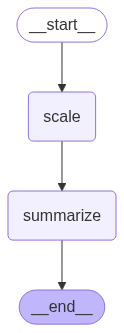

## Testing the Summary Graph


Scaled [10, 20, 30] by 1.5 → [15.0, 30.0, 45.0]
With multiplier 1.5, your scores become [15.0, 30.0, 45.0] and the average is 30.00.

Final summary: With multiplier 1.5, your scores become [15.0, 30.0, 45.0] and the average is 30.00.
